<a href="https://colab.research.google.com/github/Nachi2006/MLREPO/blob/main/Codechef_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from google.colab import files
files.upload()

{}

In [10]:

!mkdir -p ~/.kaggle

!mv kaggle-key.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle-key.json

In [55]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjoonn/codechef-competitive-programming")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'codechef-competitive-programming' dataset.
Path to dataset files: /kaggle/input/codechef-competitive-programming


Check if Given Dataset is Zipped

In [56]:
!ls

sample_data


In [57]:
import pandas as pd
quesfp=pd.read_csv("/kaggle/input/codechef-competitive-programming/questions.csv")
quesfp.head()


,QCode,Title,link,level,statement,Author,Tester,Editorial,Tags,Date Added,Time Limit,Source Limit,Languages
0,SEQUENCE,Integer Sequences,/problems/SEQUENCE,medium,\nAll submissions for this problem are availab...,friggstad,pieguy,http://discuss.codechef.com/problems/SEQUENCE,"['friggstad', 'cook07', 'medium']",30-01-2011</td> <,4 sec</td> <,50000 Bytes</td> <,"<td>ADA, ASM, BASH, BF, C, C99 str..."
1,CHEFTEAM,Chef team,/problems/CHEFTEAM,easy,\nAll submissions for this problem are availab...,anton_lunyov,friggstad,http://discuss.codechef.com/problems/CHEFTEAM,"['anton_lunyov', 'cook06', 'easy']",14-01-2011</td> <,1 sec</td> <,50000 Bytes</td> <,"<td>ADA, ASM, BASH, BF, C, C99 str..."
2,SEATR,Sereja and Tree,/problems/SEATR,medium,\nAll submissions for this problem are availab...,sereja,iscsi,http://discuss.codechef.com/problems/SEATR,"['mathematics', 'sereja', 'dynamic-prog', 'mem...",6-11-2015</td> <,10 sec</td> <,50000 Bytes</td> <,"<td>ADA, ASM, BASH, BF, C, C99 str..."
3,FLOW017,Second Largest,/problems/FLOW017,beginner,\nAll submissions for this problem are availab...,vicky002,NaN,NaN,['vicky002'],27-04-2015</td> <,1 sec</td> <,50000 Bytes</td> <,"<td>ADA, ASM, BASH, BF, C, C99 str..."
4,CFRTEST,Devu and friendship testing,/problems/CFRTEST,beginner,\nAll submissions for this problem are availab...,admin2,NaN,http://discuss.codechef.com/problems/CFRTEST,"['admin2', 'cook58', 'cakewalk']",11-05-2015</td> <,1 sec</td> <,50000 Bytes</td> <,"<td>ADA, ASM, BASH, BF, C, C99 str..."


Remove Unnecessary words from the dataset


In [58]:
quesfp["link"]=quesfp["link"].str.replace("/problems/","")
print(quesfp.head())

      QCode                        Title      link     level  \
0  SEQUENCE            Integer Sequences  SEQUENCE    medium   
1  CHEFTEAM                    Chef team  CHEFTEAM      easy   
2     SEATR              Sereja and Tree     SEATR    medium   
3   FLOW017               Second Largest   FLOW017  beginner   
4   CFRTEST  Devu and friendship testing   CFRTEST  beginner   

                                           statement        Author     Tester  \
0  \nAll submissions for this problem are availab...     friggstad     pieguy   
1  \nAll submissions for this problem are availab...  anton_lunyov  friggstad   
2  \nAll submissions for this problem are availab...        sereja      iscsi   
3  \nAll submissions for this problem are availab...      vicky002        NaN   
4  \nAll submissions for this problem are availab...        admin2        NaN   

                                       Editorial  \
0  http://discuss.codechef.com/problems/SEQUENCE   
1  http://discuss.codech

Use Beautiful Soup to remove HTML Tags



In [66]:
from bs4 import BeautifulSoup

#Check for NaN values

print(quesfp["Date Added"].isna().sum())

#Write a Beautiful Soup Function to clean HTML based Strings

def HTMLCleaner(text):
  if isinstance(text, str):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
  else:
    return ""
quesfp["Date Added"]=quesfp["Date Added"].apply(HTMLCleaner)
quesfp["Date Added"]=quesfp["Date Added"].str.replace("<","")
quesfp["Time Limit"]=quesfp["Time Limit"].apply(HTMLCleaner)
quesfp["Time Limit"]=quesfp["Time Limit"].str.replace("<","")
quesfp["Source Limit"]=quesfp["Source Limit"].apply(HTMLCleaner)
quesfp["Source Limit"]=quesfp["Source Limit"].str.replace("<","")
quesfp["Languages"]=quesfp["Languages"].apply(HTMLCleaner)
quesfp["Languages"]=quesfp["Languages"].str.replace("<","")
print(quesfp.iloc[0,4])

0

All submissions for this problem are available.

For a fixed integer n, let x1, x2, ..., x2n be a sequence that contains each of the 2n different n bit integers exactly once. To be precise, we say an integer is an n bit integer if it can be expressed in binary with exactly n bits (with, perhaps, some leading zeros). We say the sequence is gradual if two consecutive numbers differ in exactly one bit when written in binary and the first and last numbers also differ in exactly one bit in their binary representations.

Your job is to generate such a sequence. This is normally a fairly standard exercise, but there is one extra constraint. For some reason, there are two particular n bit numbers a and b such that it is illegal to have a and b appear consecutively (in either order) in the sequence and it is illegal to have one of a or b at the start of the sequence and the other at the end.

For example, if n = 2, a = 1, and b = 3 then the sequence 0, 2, 3, 1 is not allowed since a and b ar

Clean Data for all String based columns - Write a Function

In [67]:
import regex as re
def cleaner(text):
  if isinstance(text,str):
    lower = text.lower()
    white = re.sub(r'\s+', ' ', lower).strip()
    return white
  else:
    return ""
quesfp["Languages"]=quesfp["Languages"].apply(cleaner)
quesfp["statement"]=quesfp["statement"].apply(cleaner)
quesfp.head()

,QCode,Title,link,level,statement,Author,Tester,Editorial,Tags,Date Added,Time Limit,Source Limit,Languages
0,SEQUENCE,Integer Sequences,SEQUENCE,medium,all submissions for this problem are available...,friggstad,pieguy,http://discuss.codechef.com/problems/SEQUENCE,"['friggstad', 'cook07', 'medium']",30-01-2011,4 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
1,CHEFTEAM,Chef team,CHEFTEAM,easy,all submissions for this problem are available...,anton_lunyov,friggstad,http://discuss.codechef.com/problems/CHEFTEAM,"['anton_lunyov', 'cook06', 'easy']",14-01-2011,1 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
2,SEATR,Sereja and Tree,SEATR,medium,all submissions for this problem are available...,sereja,iscsi,http://discuss.codechef.com/problems/SEATR,"['mathematics', 'sereja', 'dynamic-prog', 'mem...",6-11-2015,10 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
3,FLOW017,Second Largest,FLOW017,beginner,all submissions for this problem are available...,vicky002,NaN,NaN,['vicky002'],27-04-2015,1 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
4,CFRTEST,Devu and friendship testing,CFRTEST,beginner,all submissions for this problem are available...,admin2,NaN,http://discuss.codechef.com/problems/CFRTEST,"['admin2', 'cook58', 'cakewalk']",11-05-2015,1 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."


Explode the tags to map tags correctly for efficient searching if required

In [69]:
newdf=quesfp.assign(Tags=quesfp['Tags'].str.split(',')).explode('Tags')
newdf["Tags"]=newdf["Tags"].str.replace("[","")
newdf["Tags"]=newdf["Tags"].str.replace("]","")
newdf.head()

,QCode,Title,link,level,statement,Author,Tester,Editorial,Tags,Date Added,Time Limit,Source Limit,Languages
0,SEQUENCE,Integer Sequences,SEQUENCE,medium,all submissions for this problem are available...,friggstad,pieguy,http://discuss.codechef.com/problems/SEQUENCE,'friggstad',30-01-2011,4 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
0,SEQUENCE,Integer Sequences,SEQUENCE,medium,all submissions for this problem are available...,friggstad,pieguy,http://discuss.codechef.com/problems/SEQUENCE,'cook07',30-01-2011,4 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
0,SEQUENCE,Integer Sequences,SEQUENCE,medium,all submissions for this problem are available...,friggstad,pieguy,http://discuss.codechef.com/problems/SEQUENCE,'medium',30-01-2011,4 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
1,CHEFTEAM,Chef team,CHEFTEAM,easy,all submissions for this problem are available...,anton_lunyov,friggstad,http://discuss.codechef.com/problems/CHEFTEAM,'anton_lunyov',14-01-2011,1 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."
1,CHEFTEAM,Chef team,CHEFTEAM,easy,all submissions for this problem are available...,anton_lunyov,friggstad,http://discuss.codechef.com/problems/CHEFTEAM,'cook06',14-01-2011,1 sec,50000 Bytes,"ada, asm, bash, bf, c, c99 strict, caml, cloj,..."


Lemmatize the Problem Statement to Vectorize

In [76]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    if not isinstance(text, str):
        return ""

    lemmatized_words = []
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    for word, tag in tagged_words:
        wn_tag = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        lemmatized_words.append(lemma)

    return " ".join(lemmatized_words)
newques=quesfp["statement"].apply(lemmatize_text)
newques.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,statement
0,all submission for this problem be available ....
1,all submission for this problem be available ....
2,all submission for this problem be available ....
3,all submission for this problem be available ....
4,all submission for this problem be available ....


Use Sentence Transformers to Transform the Data

In [77]:
pip install sentence-transformers

In [80]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

# Use the newques Series directly as it contains the lemmatized statements
sentences = newques.tolist()

print("Vectorizing text... This may take a moment.")
embeddings = model.encode(sentences)

print("Vectorization complete.")
print(f"\nShape of the vector matrix: {embeddings.shape}")
print("\nExample of the first vector (first 5 dimensions):")
print(embeddings[0][:5])

# Assign the embeddings to a new column in the original DataFrame
newques['vector'] = list(embeddings)

print("\n--- DataFrame with Vectors ---")
print(newques.head())

Vectorizing text... This may take a moment.
Vectorization complete.

Shape of the vector matrix: (1474, 384)

Example of the first vector (first 5 dimensions):
[-0.05188443  0.02779483  0.0049299  -0.10543075 -0.04339747]

--- DataFrame with Vectors ---
0    all submission for this problem be available ....
1    all submission for this problem be available ....
2    all submission for this problem be available ....
3    all submission for this problem be available ....
4    all submission for this problem be available ....
Name: statement, dtype: object


In [100]:
# Install required libraries if not already installed
!pip install umap-learn hdbscan

import umap
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Prepare the embeddings for clustering
# Access the list of embeddings from the 'vector' column and stack them
embedding_matrix = np.vstack(quesfp['vector'].tolist())

print(f"Embedding matrix shape: {embedding_matrix.shape}")

def clustering_pipeline(embeddings, method='sentence_transformer'):

        # For sentence transformer embeddings
    umap_params = {
            'n_components': 30,  # Start with more dimensions
            'n_neighbors': 15,   # Larger neighborhood for global structure
            'min_dist': 0.08,
            'metric': 'cosine',
            'random_state': 38
    }

    print("Applying UMAP dimensionality reduction...")
    umap_reducer = umap.UMAP(**umap_params)
    umap_embeddings = umap_reducer.fit_transform(embeddings)

    # Step 2: Try multiple HDBSCAN parameter combinations
    param_combinations = [
        {'min_cluster_size': 10, 'min_samples': 5, 'cluster_selection_epsilon': 0.1},
        {'min_cluster_size': 15, 'min_samples': 7, 'cluster_selection_epsilon': 0.2},
        {'min_cluster_size': 20, 'min_samples': 10, 'cluster_selection_epsilon': 0.15},
        {'min_cluster_size': 25, 'min_samples': 12, 'cluster_selection_epsilon': 0.1},
    ]

    best_score = -1
    best_labels = None
    best_params = None

    for params in param_combinations:
        clusterer = hdbscan.HDBSCAN(**params)
        labels = clusterer.fit_predict(umap_embeddings)

        # Calculate quality metrics (excluding noise)
        non_noise_mask = labels != -1
        if len(np.unique(labels[non_noise_mask])) > 1 and np.sum(non_noise_mask) > 10:
            from sklearn.metrics import silhouette_score
            score = silhouette_score(umap_embeddings[non_noise_mask], labels[non_noise_mask])

            if score > best_score:
                best_score = score
                best_labels = labels
                best_params = params

    print(f"Best Silhouette Score: {best_score:.4f}")
    print(f"Best Parameters: {best_params}")

    return best_labels, umap_embeddings, best_params

Embedding matrix shape: (1474, 384)



=== Final Improved Clustering RESULTS ===
Number of clusters: 3
Silhouette Score: 0.1681
Noise percentage: 0.14%


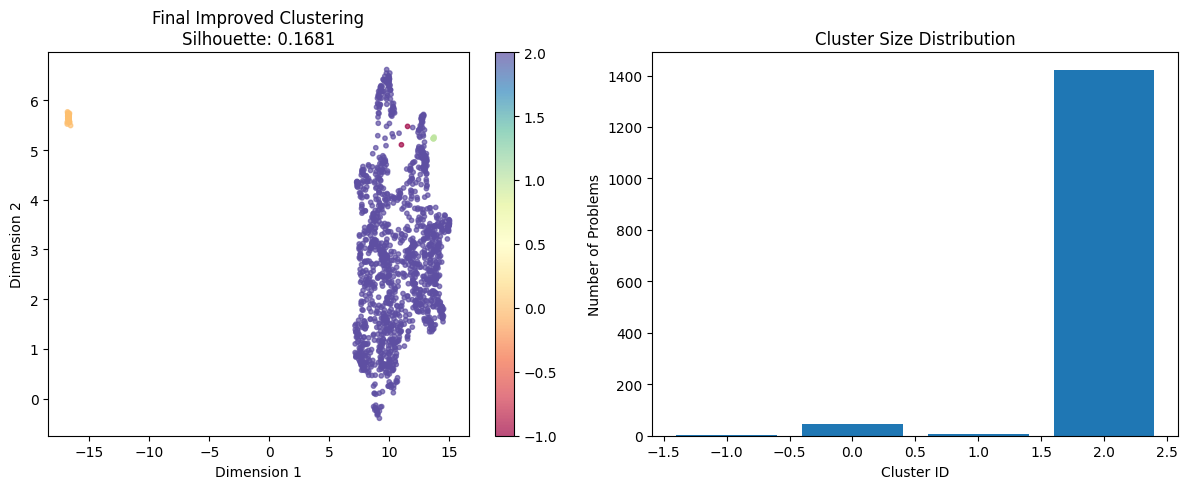


=== NOISE POINTS (2 problems) ===
  - NOLOGIC: all submissions for this problem are available. consider the following dialog. - father, what is the...
  - TSUBSTR: all submissions for this problem are available. chefland scientists have made a new invention! they ...

=== CLUSTER 0 (46 problems) ===
  - SEREJA: function formattime(ts) { now = new date(ts); localtime = new date(); hour = now.gethours(); min = n...
  - MANYCHEF: function formattime(ts) { now = new date(ts); localtime = new date(); hour = now.gethours(); min = n...
  - CIRCLEQ: function formattime(ts) { now = new date(ts); localtime = new date(); hour = now.gethours(); min = n...
  Top tags: medium(11), simple(6), dp(6), admin(5), easy(5)

=== CLUSTER 1 (6 problems) ===
  - LUCKYBAL: all submissions for this problem are available. a little elephant from the zoo of lviv likes lucky s...
  - LUCKFILL: all submissions for this problem are available. a little elephant from the zoo of lviv likes lucky s...
  - LUCKYSTR: all s

In [101]:
def evaluate_and_visualize(df, labels, embeddings, title="Improved Clustering"):
    """Comprehensive evaluation and visualization"""
    from sklearn.metrics import silhouette_score
    import matplotlib.pyplot as plt

    # Calculate metrics
    non_noise_mask = labels != -1
    n_clusters = len(np.unique(labels[non_noise_mask]))

    if n_clusters > 1:
        silhouette_avg = silhouette_score(embeddings[non_noise_mask], labels[non_noise_mask])
    else:
        silhouette_avg = -1

    print(f"\n=== {title} RESULTS ===")
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Noise percentage: {(labels == -1).sum() / len(labels) * 100:.2f}%")

    # Visualization
    if embeddings.shape[1] > 1:
        plt.figure(figsize=(12, 5))

        # 2D visualization (use first two dimensions)
        plt.subplot(1, 2, 1)
        scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1],
                            c=labels, cmap='Spectral', s=10, alpha=0.7)
        plt.colorbar(scatter)
        plt.title(f'{title}\nSilhouette: {silhouette_avg:.4f}')
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')

        # Cluster size distribution
        plt.subplot(1, 2, 2)
        unique, counts = np.unique(labels, return_counts=True)
        plt.bar(unique, counts)
        plt.title('Cluster Size Distribution')
        plt.xlabel('Cluster ID')
        plt.ylabel('Number of Problems')

        plt.tight_layout()
        plt.show()

    return silhouette_avg

# Evaluate the improved clustering
final_score = evaluate_and_visualize(quesfp, cluster_labels, umap_embeddings, "Final Improved Clustering")

# Analyze cluster content
def analyze_cluster_content(df, cluster_col='cluster'):
    """Analyze what's in each cluster"""
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]

        if cluster_id == -1:
            print(f"\n=== NOISE POINTS ({len(cluster_data)} problems) ===")
        else:
            print(f"\n=== CLUSTER {cluster_id} ({len(cluster_data)} problems) ===")

        # Show sample problems
        samples = cluster_data.head(3)
        for idx, row in samples.iterrows():
            print(f"  - {row['link']}: {row['statement'][:100]}...")

        # Most common tags in cluster
        if cluster_id != -1:
            all_tags = []
            for tags in cluster_data['Tags'].dropna():
                clean_tags = str(tags).replace('[', '').replace(']', '').replace("'", "").split(',')
                all_tags.extend([tag.strip() for tag in clean_tags if tag.strip()])

            if all_tags:
                tag_counts = pd.Series(all_tags).value_counts().head(5)
                print(f"  Top tags: {', '.join([f'{tag}({count})' for tag, count in tag_counts.items()])}")

analyze_cluster_content(quesfp, 'cluster')